In [27]:
import numpy as np  # image file format will be arrays in numpy
import cv2 as cv  # images will be taken using OpenCV, specifically, opencv-python
import matplotlib.pyplot as plt  # shows images in the notebook and shows charts
from sklearn.cluster import KMeans
import pandas as pd
import glob

In [28]:
def image_in(file_location):
    '''
    Reads an image from a local file location. 
    Shows the image to the user, converts the image to an RGB numpy array, cuts out coordinate data, and returns it.
    
    file_location is a string.
    
    All formats readable by opencv should be accepted. Larger images may cause processing trouble.
    
    ex:
    
    imported_image, shape_0, shape_1 = image_in('data/capturecopy2.png')'''
    try:
        image = cv.imread(file_location)  # input the image
        plt.imshow((cv.cvtColor(image, cv.COLOR_BGR2RGB)))  # display the image (optional)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # convert the image from BGR to RGB color space
        imshape_0 = image.shape[0]  # height in pixels
        imshape_1 = image.shape[1]  # width in pixels
        image = image.reshape(imshape_0 * imshape_1, 3)  # removes pixel coordinate data from image
        return image, imshape_0,imshape_1
        
    except Exception:
        print('Error: image input failed.')

In [29]:
def make_3d_scatterplot(image_colors):
    '''
    Show a 3D scatterplot of an image's colors.
    
    ex:
    
    make_3d_scatterplot(imported_image)
    '''
    try:
        image_RGB_scaled = image_colors / 255  # making matplotlib compatible RGB values
        fig = plt.figure(figsize = [16,10])
        ax = plt.axes(projection = '3d')

        ax.scatter3D(xs = image_colors[:, 0], ys = image_colors[:, 1], zs = image_colors[:, 2], c = image_RGB_scaled)
        plt.show()
        return None
    
    except Exception:
        print('Error: scatterplot unsuccessful.')

In [30]:
def produce_color_clusters(image, groups = 6, model = 'kmeans', random_seed = 0):
    '''Produces clusters in RGB color space.
    
    Returns group predictions for each pixel in the image.
    
    Currently only produces kmeans clusters.
    
    ex:
    color_clusters = produce_color_clusters(imported_image)
    
    '''
    try:
        if model == 'kmeans':
            kmeans_model = KMeans(n_clusters = groups, random_state = random_seed)
            kmeans_model.fit(X = image)
            predicted_groups = kmeans_model.predict(image)
            return predicted_groups, groups
        
    except Exception:
        print('Error: clustering was unsuccessful.')

In [34]:
def painted_image_summary(image, predicted_groups):
    '''
    Uses an imported image and its color cluster predictions to paint over the image,
    using in the mean colors of each cluster.
    
    ex:
    painted_image_summary(imported_image, color_clusters)
    '''
    try:
        pixel_colors = [None]*len(predicted_groups)

        for group in range(groups):
    
            in_group = (predicted_groups == group)

            group_size = image[in_group].shape[0]

            # finding mean RGB values for the pixels in each group
            pixels_in_group = image[in_group]

            R = pixels_in_group[:,0]
            mean_R = np.mean(R)

            G = pixels_in_group[:,1]
            mean_G = np.mean(G)

            B = pixels_in_group[:,2]
            mean_B = np.mean(B)

            # creating an array of point colors for matplotlib
            # scaled to 0-1 in order to work correctly
            for pixel_index in range(len(pixel_colors)):
                if in_group[pixel_index]:
                    pixel_colors[pixel_index] =[mean_R / 255, mean_G / 255, mean_B / 255]
                else:
                    pass
        
        painted_image = np.array(pixel_colors).reshape(shape_0, shape_1, 3)
        plt.imshow(painted_image)
        plt.show()
        return None
    
    except Exception:
        print('Error: Painted image summary unsuccessful.')
    

In [35]:
def show_photo_palette(predicted_groups, num_groups = 6, top_n = 3):
    '''
    Produces a rectangle that shows each of the grouped colors and its size relative to the total image.
    
    ex:
    
    show_photo_palette(color_clusters)
    '''
    # finding the size of each group
    group_sizes = []
    for group_no in range(num_groups):
        in_group = (predicted_groups == group_no)
        group_size = imported_image[in_group].shape[0]
        group_sizes.append(group_size)
    
    # sorting groups by group size
    group_sizes_df = pd.DataFrame(data = group_sizes, columns = ['num_elements'])
    group_sizes_df.sort_values(by = 'num_elements', ascending = False, inplace = True)
    size_order = group_sizes_df.index
    
    # creating an array of group colors in size order
    group_colors = []
    for group in size_order:
        in_group = (predicted_groups == group)

        group_size = imported_image[in_group].shape[0]
        
        # finding mean RGB values for the pixels in each group
        pixels_in_group = imported_image[in_group]

        R = pixels_in_group[:,0]
        mean_R = np.mean(R)

        G = pixels_in_group[:,1]
        mean_G = np.mean(G)

        B = pixels_in_group[:,2]
        mean_B = np.mean(B)

        # creating an array of point colors for matplotlib
        # scaled to 0-1 in order to work correctly
        for count in range(group_size):
            group_colors.append([mean_R / 255, mean_G / 255, mean_B / 255])

    

    returned_image = np.array(group_colors).reshape(shape_0, shape_1, 3)
    # showing the image with only the mean group colors included
    plt.imshow(returned_image)
    plt.show()
    return None

Please select a photo to consider.
1, 2, or 3?
2
data\2.png


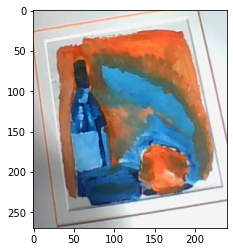

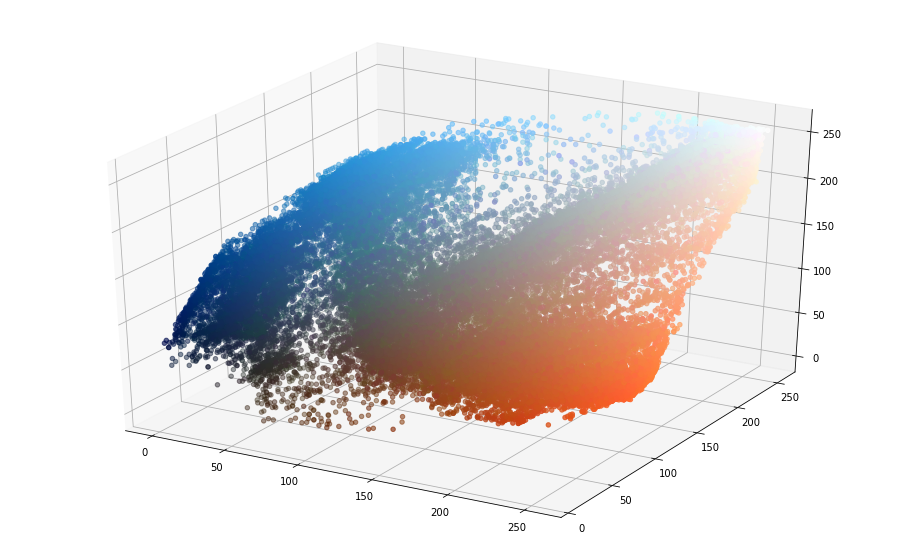

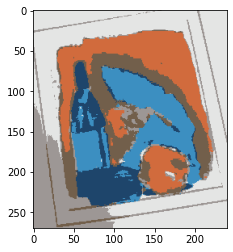

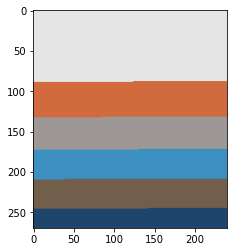

In [42]:
print('Please select a photo to consider.')
file_name = str(input('1, 2, or 3?\n'))
full_file_name = glob.glob(f'data/{file_name}.*')
print(full_file_name[0])

imported_image, shape_0, shape_1 = image_in(full_file_name[0])
make_3d_scatterplot(imported_image)
color_clusters, groups = produce_color_clusters(imported_image)
painted_image_summary(imported_image, color_clusters)
show_photo_palette(color_clusters)